2018314034 홍석우

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

In [2]:
df = pd.read_csv("insurance_data.csv")
df = (df-df.mean()) / df.std()
regression = linear_model.LinearRegression()
regression.fit(np.array(df.age).reshape((-1, 1)), df.bought_insurance)
bought_insurance_pred = regression.predict(np.array(df.age).reshape((-1, 1)))
df['bought_insurance_pred'] = bought_insurance_pred

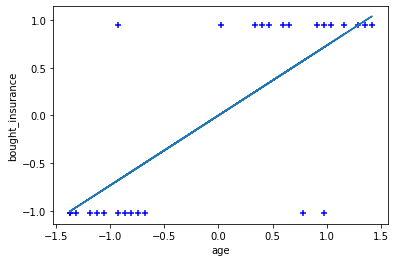

In [3]:
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.scatter(df.age, df.bought_insurance, color='blue', marker='+')
plt.plot(df.age, df.bought_insurance_pred)
plt.show()

In [4]:
print(regression.intercept_)
print(regression.coef_)

-4.702672023723909e-17
[0.73239481]


In [5]:
def GD(X, Y):

    alpha = regression.intercept_
    beta = regression.coef_[0] 
 
    lr = 1e-2
    n = X.shape[0]
    plt.scatter(X.reshape((-1)), Y, color='blue', marker='.')
    for i in range(1000):
        Y_pred = (alpha + beta * X).reshape((-1)) 
        d_beta = (2/n)*np.sum(X*(Y_pred-Y).reshape((-1, 1)))
        d_alpha = (2/n)*np.sum(Y_pred-Y)
        beta -= lr * d_beta
        alpha -= lr * d_alpha
    plt.plot(X.reshape((-1)), Y_pred, color='red')

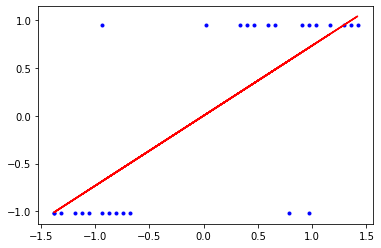

In [6]:
X = np.array(df.age).reshape((-1, 1))
Y = np.array(df.bought_insurance) 
GD(X, Y)